# **Tests for Numerical CLUE**

In this notebook we are going to test out (with several examples) how the implementation of numerical CLUE works on different type of examples:

* Basic polynomial examples (for shake of testing the code)
* Rational examples (this will be an improvement from the ERODE current implementation)

For each of the models we are going to perform several tests:

- With the **exact model**: 
  * We increase the $\delta$ threshold slowly until we aggregate everything together. This produces two different graphical values:
    1. Given $\delta$, the number of reduced species. 
    2. Given $\delta$, the error of the observed species.
- We **perturb the model** using a small random noise:
  * We check if we manage to obtain the original reduction for some $\delta$.
  * We check if the observed quantity is close to the **true** value.
  
Since we need to perform similar runs for different models, the notebook will start with a section dedicated to set up generic functions to run each of the tests. Then, further sections will run these generic functions for specific models with small comments on the results.


In [12]:
## Adding appropriate paths for loading examples
import sys, os

sys.path.insert(0,"./../") # clue and models are here
sys.path.insert(0, "./../tests") # eramples is here

from clue import *
from clue.simulations import *
from examples.examples_data import *

## 1. Generic testing functions

In [2]:
def run_exact_test(example_name):
    example = get_example(example_name)
    f = open(os.devnull, "w")
    
    ## Exact model
    system = FODESystem(file=example.path_model(), read_ic = True, parser=example.read)
    print("Computing the exact lumpings...")
    lumped_systems = []
    for obs_set in example.observables:
        obs_polys = [SparsePolynomial.from_string(s, system.variables, system.field) for s in obs_set]
        lumped_systems.append(system.lumping(obs_polys, method=example.matrix, file=f))
    print("Computed exact lumpings!")
    print(f"Size of original lumpings: {[sys.size for sys in lumped_systems]}")
    
    print("Computing the numerical lumpings...")
    delta = 0; increase = 0.1
    numerical_lumpings = []
    while len(numerical_lumpings) == 0 or any(numerical_lumpings[-1][i].size > len(example.observables[i]) for i in range(len(numerical_lumpings[-1]))):
        print(f"Running case with {delta=}")
        num_system = FODESystem(file=example.path_model(), parser=example.read, lumping_subspace=NumericalSubspace, lumping_subspace_kwds={"delta": delta})
        new_lumpings = []
        for obs_set in example.observables:
            obs_polys = [SparsePolynomial.from_string(s, system.variables, system.field) for s in obs_set]
            new_lumpings.append(num_system.lumping(obs_polys, method=example.matrix, file=f))
        numerical_lumpings.append(new_lumpings)
        print(f"Current size of lumping is: {[sys.size for sys in numerical_lumpings[-1]]}")
        delta += increase
    
    return system, lumped_systems, numerical_lumpings

In [3]:
system, lumped, numerical = run_exact_test("ProteinPhosphorylation[2]")

Computing the exact lumpings...
Computed exact lumpings!
Size of original lumpings: [12]
Computing the numerical lumpings...
Running case with delta=0
Current size of lumping is: [12]
Running case with delta=0.1
Current size of lumping is: [12]
Running case with delta=0.2
Current size of lumping is: [12]
Running case with delta=0.30000000000000004
Current size of lumping is: [12]
Running case with delta=0.4
Current size of lumping is: [12]
Running case with delta=0.5
Current size of lumping is: [12]
Running case with delta=0.6
Current size of lumping is: [12]
Running case with delta=0.7
Current size of lumping is: [12]
Running case with delta=0.7999999999999999
Current size of lumping is: [12]
Running case with delta=0.8999999999999999
Current size of lumping is: [12]
Running case with delta=0.9999999999999999
Current size of lumping is: [12]
Running case with delta=1.0999999999999999
Current size of lumping is: [12]
Running case with delta=1.2
Current size of lumping is: [12]
Running 

In [19]:
lumped[0].observables

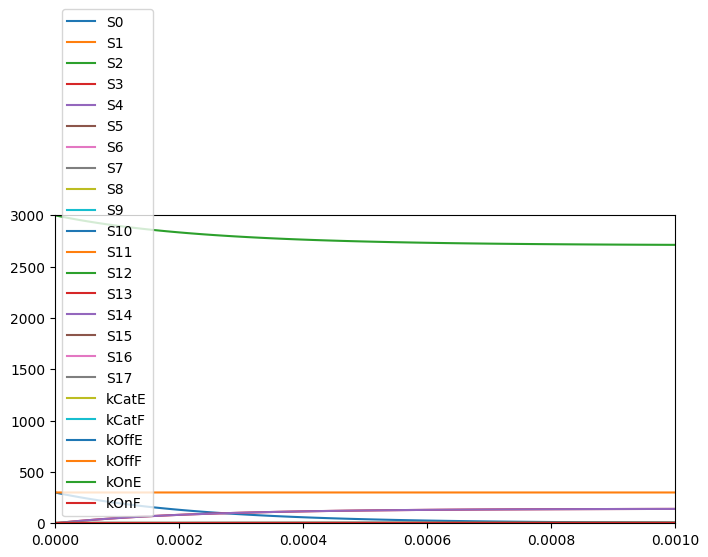

In [23]:
create_figure(system.simulate(0, 0.001, [float(system.ic.get(v, 0)) for v in system.variables], tstep=0.00001), format="-");

In [4]:
example = get_example("ProteinPhosphorylation[2]")

In [7]:
example.observables

[['S0', 'S1']]